###  Detect credit card fraud transactions using Logistic Regression</span>

- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [6]:
# Drop the 'Time' column
df = df.drop(['Time'], axis=1)

In [8]:
# Split the data into features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

In [16]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [20]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



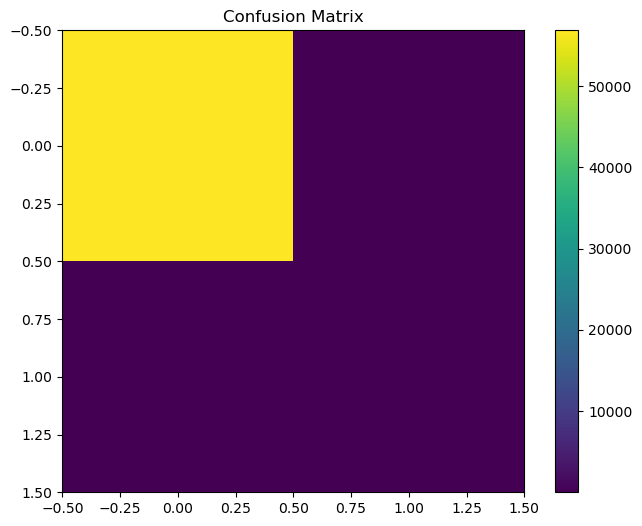

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

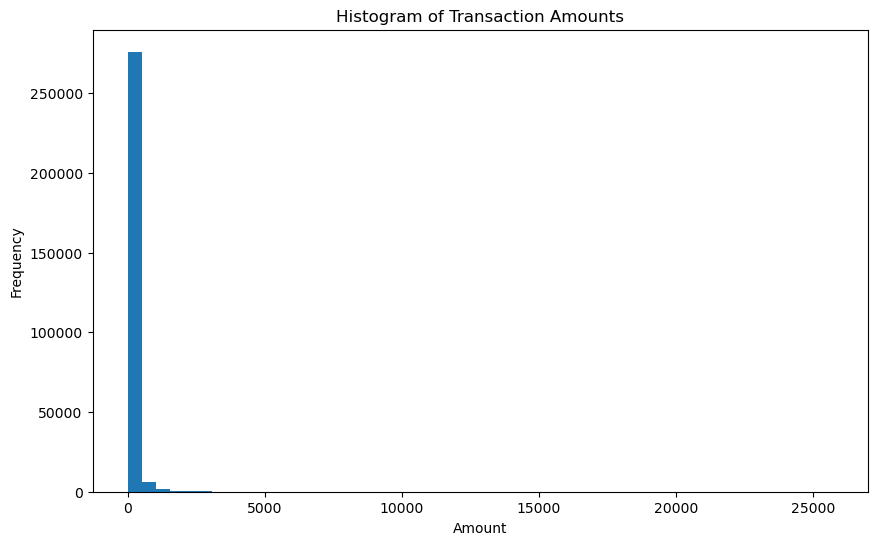

In [24]:
# Use histogram to represent all the data
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()